#  Fifa 2019 Analysis
## Main questions:
### 1. What physical or technical properties of a player increase the overall performance most?
### 2. How accurately can we tell the position of the player just knowing physical and technical features of a player?

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# importing data
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [7]:
# assigning dataframe to 'df' and droping unnecessary columns 
df = data.drop(columns=['Unnamed: 0', 'ID', 'Photo', 'Flag', 
                     'Club Logo', 'Real Face', 'Jersey Number', 
                     'Loaned From', 'Contract Valid Until', 'Release Clause'], axis=1)

In [8]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [15]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Joined', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

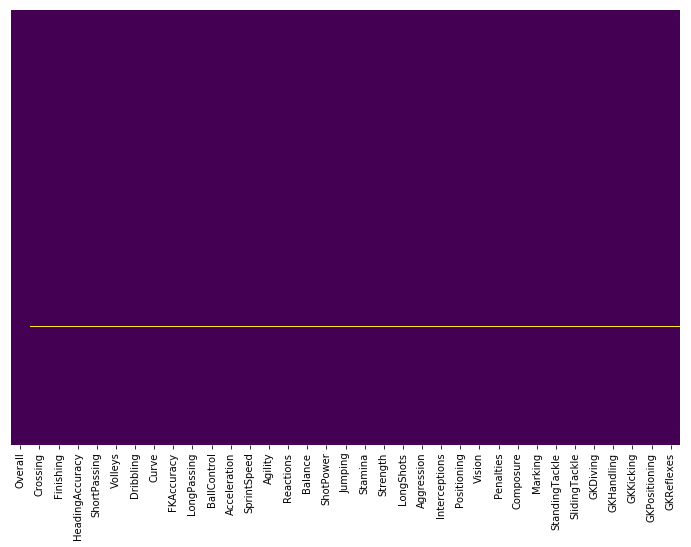

In [16]:
# looking how distributed are null values
plt.figure(figsize=(12,8))
sns.heatmap(df[['Overall', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

In [23]:
# assign 'df' to name 'properties' and droping null values
properties = df[['Overall', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
properties.dropna(inplace=True)
properties['Crossing'].isnull().sum()

0

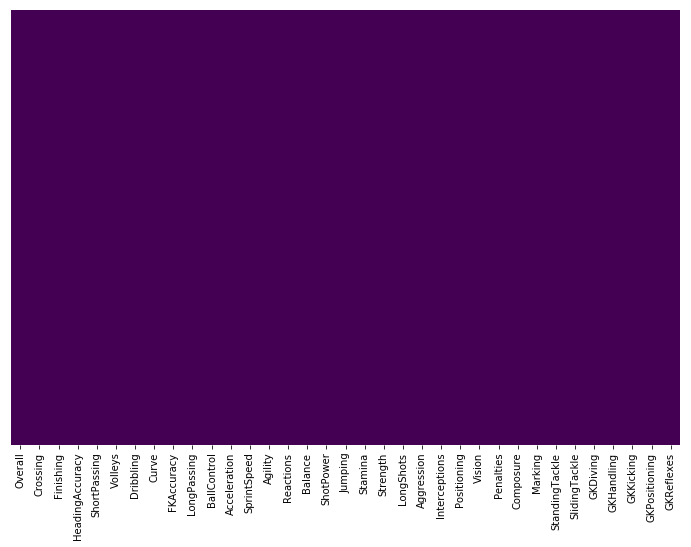

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(properties[['Overall', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

In [25]:
properties.describe()

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,66.249904,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,6.914613,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,46.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,62.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,66.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,71.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,94.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [ ]:
# when I have clean dataframe with all important properties of a player I can start investigate 
# which of them is most important for overall performance.

# 1. What physical or technical properties of a player increase the overall performance most?

## Multiple Linear Regression

In [26]:
# from correlation matrix taking just overall performance column and sort it
properties.corr()['Overall'].sort_values(ascending=False)

Overall            1.000000
Reactions          0.850045
Composure          0.727655
ShortPassing       0.502550
Vision             0.498894
LongPassing        0.483909
BallControl        0.460197
ShotPower          0.441118
LongShots          0.420795
Curve              0.419491
FKAccuracy         0.396892
Aggression         0.395470
Crossing           0.394972
Volleys            0.391338
Dribbling          0.372426
Stamina            0.365656
Positioning        0.356493
Strength           0.349326
Penalties          0.341429
HeadingAccuracy    0.340776
Finishing          0.332515
Interceptions      0.321326
Marking            0.286505
Agility            0.264952
Jumping            0.264435
StandingTackle     0.252629
SlidingTackle      0.222811
SprintSpeed        0.210647
Acceleration       0.196869
Balance            0.103160
GKPositioning     -0.017674
GKReflexes        -0.023276
GKHandling        -0.025062
GKDiving          -0.025937
GKKicking         -0.029372
Name: Overall, dtype

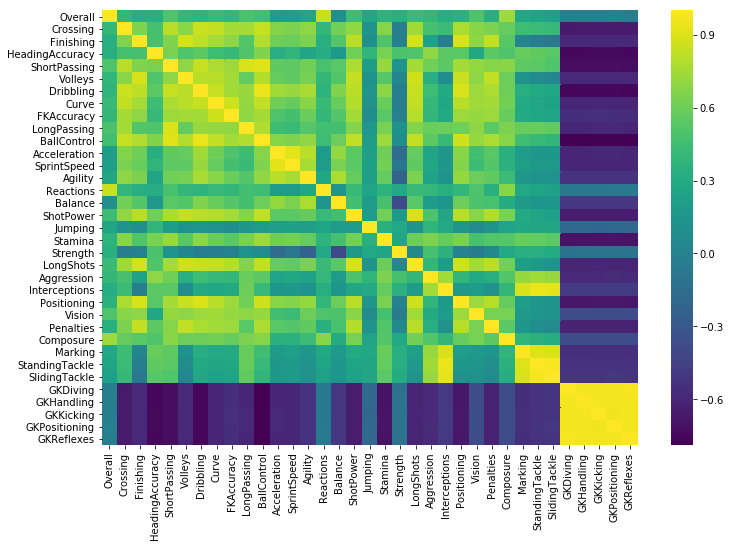

In [31]:
# as we can see in the graph below there are plenty of properties that correlate. 
# In order to avoid collinearity we have to exclude one from correlating pair 
# (except when high (>.8) correlation appears with target feature this case 'Overall')
plt.figure(figsize=(12,8))
sns.heatmap(properties.corr(), cmap='viridis')
plt.show()

In [32]:
# after excluding collinear properties I got these features
# for those of whom this and previous steps are confusing I suggest reading about collinearity 
regModel = properties[['Overall', 'Strength', 'Stamina', 'Jumping', 'Composure', 'Reactions', 'ShortPassing', 'GKKicking']]

In [33]:
regModel.corr()["Overall"].sort_values(ascending=False).head(12)

# here I explain features:
# Reactions: measures how quickly a player responds to a situation happening around him. 
# It has nothing to do with the player’s speed.


# Composure: this attribute determines at what distance the player 
# with the ball starts feeling the pressure from the opponent. 
# This then affects the chances of the player making an error when he shoots, 
# passes and crosses.

Overall         1.000000
Reactions       0.850045
Composure       0.727655
ShortPassing    0.502550
Stamina         0.365656
Strength        0.349326
Jumping         0.264435
GKKicking      -0.029372
Name: Overall, dtype: float64

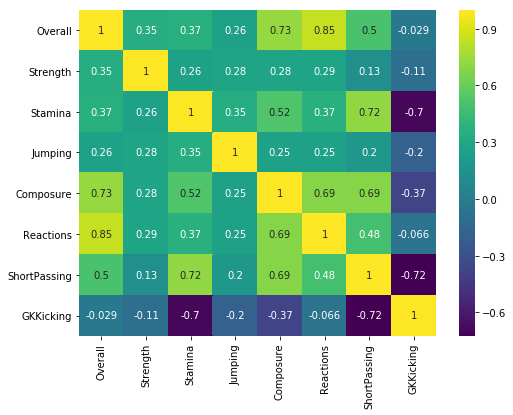

In [36]:
# last time checking to avoid collinearity
plt.figure(figsize=(8,6))
sns.heatmap(regModel.corr(), cmap='viridis', annot=True)
plt.show()

In [37]:
# assign x and y
X = regModel[['Strength', 'Stamina', 'Jumping', 'Composure', 'Reactions', 'ShortPassing', 'GKKicking']]
y = regModel['Overall']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# spliting variables into train and test, setting test_size and random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
# instantiate LinearRegression model and assign it to 'lm'
lm = LinearRegression()

In [42]:
# fitting my training data to the model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Evaluation

In [43]:
# here I'm creating dataframe from my model coefficients
coefs = pd.DataFrame(lm.coef_, X_train.columns, columns=["Coefficients"])

In [44]:
print(f'rSquared: {round(lm.score(X_train, y_train), 3)}')
coefs
# rSquared is a metric which describe how good is your model.
# coefficients interpretation: if you hold other features fixed and increase 'Reactions'
# in one unit you get increase in 'Overall' by 0.379

rSquared: 0.812


,Coefficients
Strength,0.062623
Stamina,0.024556
Jumping,0.021742
Composure,0.154760
Reactions,0.379718
ShortPassing,0.138966
GKKicking,0.156338


## Model Predicions

In [45]:
# in order to get predicions I input 'X_test' values to the model's predict method 
# and assign to the variable 'predictions'
predictions = lm.predict(X_test)

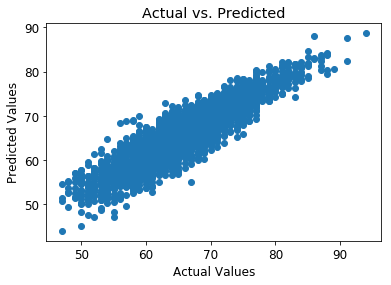

In [46]:
# plot actual vs. predicted values
plt.rcParams.update({'font.size': 12})
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.scatter(y_test, predictions)
plt.show()

In [47]:
from sklearn import metrics

Root Mean Squared Error: 2.927


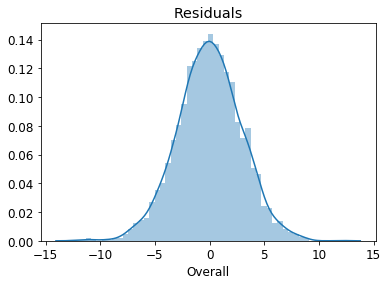

In [48]:
# here I use a metric (Root Mean Squared Error) which represents difference between real and predicted values.
# this difference is expressed in the same units as predicted value (in this case 'Overall')
# other way to test your model is to plot residuals distribution. If it visually seems normally distributed and mean around 0 
# it indicates that your model is the right decision for this data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {round(rmse, 3)}")
plt.title('Residuals')
sns.distplot((y_test-predictions),bins=50)
plt.show()

# 2. How accurately can we tell the position of the player just knowing physical and technical features of a player?

# KNN Classification

In [68]:
# creating separate dataframe with "Position" column
features = df[['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Position']]

In [69]:
# cheching for null values
features.isnull().sum()

Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
Position           60
dtype: int64

In [70]:
# droping null values
features.dropna(inplace=True)

In [50]:
features.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,RF
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,ST
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,LW
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,GK
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,RCM


In [51]:
# checking how many unique positions I have
features.Position.nunique()

27

In [72]:
# function which changes position from goolkeeper to 1, defender to 2, midfielder to 3, striker to 4.
def simplePosition(col):
    if (col == 'GK'):
        return 1
    elif ((col == 'RB') | (col == 'LB') | (col == 'CB') | (col == 'LCB') | (col == 'RCB') | (col == 'RWB') | (col == 'LWB') ):
        return 2
    elif ((col == 'LDM') | (col == 'CDM') | (col == 'RDM') | (col == 'LM') | (col == 'LCM') | 
          (col == 'CM') | (col == 'RCM') | (col == 'RM') | (col == 'LAM') | (col == 'CAM') | 
          (col == 'RAM') | (col == 'LW') | (col == 'RW')):
        return 3
    elif ((col == 'RS') | (col == 'ST') | (col == 'LS') | (col == 'CF') | (col == 'LF') | (col == 'RF')):
        return 4
    else:
        return 'error'

In [73]:
# applying that funcion to position column
features["Position"] = features.Position.apply(simplePosition)

In [74]:
features.Position.unique()

array([4, 3, 1, 2], dtype=int64)

In [55]:
features.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,4
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,4
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3


In [56]:
from sklearn.preprocessing import StandardScaler

In [79]:
# instantiating StandardScaler object
scaler = StandardScaler()

In [80]:
# fitting data to the scaler object except position column
scaler.fit(features.drop('Position', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [87]:
# perform actual scaling
scaled_fetures = scaler.transform(features.drop('Position', axis=1))

In [88]:
# and now we have dataframe with scaled features
df_features = pd.DataFrame(scaled_fetures, columns=features.columns[:-1])

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
# assign scaled features dataframe and position column to the varibles.
feat = df_features
targ = features.Position
# spliting data into train and test
xTrain, xTest, yTrain, yTest = train_test_split(feat, targ, test_size=0.2, random_state=42)

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier(n_neighbors=1)

In [93]:
knn.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Model Evaluation

In [94]:
pred = knn.predict(xTest)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
# confusion matrix and classification report explains how good our classification algorith performs
print(confusion_matrix(yTest, pred))
print('\n')
print(classification_report(yTest, pred))

[[ 407    0    0    0]
 [   0 1007  148    2]
 [   0  139 1290  112]
 [   0    2  109  414]]


             precision    recall  f1-score   support

          1       1.00      1.00      1.00       407
          2       0.88      0.87      0.87      1157
          3       0.83      0.84      0.84      1541
          4       0.78      0.79      0.79       525

avg / total       0.86      0.86      0.86      3630



In [98]:
confMatrix = confusion_matrix(yTest, pred)

In [99]:
# this function plots good looking confusion matrix, accuracy and error rates. 
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

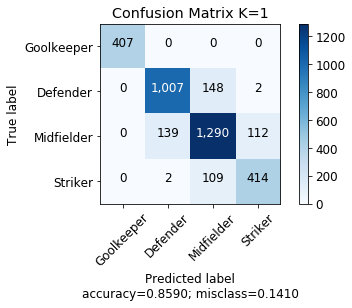

In [100]:
# here is same, but a bit better looking confusion matrix 
plot_confusion_matrix(cm = confMatrix, normalize = False, 
                      target_names = ['Goolkeeper', 'Defender', 'Midfielder', 'Striker'],
                      title= "Confusion Matrix K=1")

In [101]:
# here I am looping through same classification algorithm with different n_neighbors values
error_rate = []
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    error_rate.append(np.mean(pred_i != yTest))

Text(0,0.5,'Error Rate')

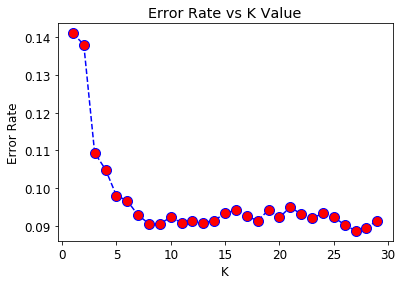

In [103]:
# error rate for different number neighbors (K)
# as we can see around 8 or 9 neighbors error rate reach plateau
plt.plot(range(1,30),error_rate,color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [104]:
# rerun classification algorith with n_neighbors where error rate was smallest
# it is always better to choose odd number of neighbors
Knn = KNeighborsClassifier(n_neighbors=9)
Knn.fit(xTrain, yTrain)
pred_9 = Knn.predict(xTest)
print(confusion_matrix(yTest, pred_9))
print('\n')
print(classification_report(yTest, pred_9))

[[ 407    0    0    0]
 [   0 1050  105    2]
 [   0   85 1390   66]
 [   0    1   70  454]]


             precision    recall  f1-score   support

          1       1.00      1.00      1.00       407
          2       0.92      0.91      0.92      1157
          3       0.89      0.90      0.90      1541
          4       0.87      0.86      0.87       525

avg / total       0.91      0.91      0.91      3630



In [106]:
conf9Matrix = confusion_matrix(yTest, pred_9)

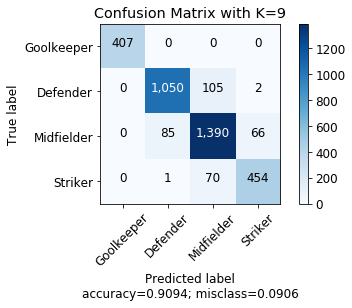

In [110]:
# model prediction improved from ~86% to ~90%
plot_confusion_matrix(cm = conf9Matrix, normalize = False, 
                      target_names = ['Goolkeeper', 'Defender', 'Midfielder', 'Striker'],
                      title = "Confusion Matrix with K=9")

# Conclusion
## 1. Player reactions and composure increase overall performance most
## 2. With ~90% accuracy we can predict players position just knowing physical and technical features. 